In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cs-training.csv")
df.head()
df=df.sample(frac=1)  #to shuffle and give 100% data so frac=1

In [3]:
df.shape

(150000, 12)

In [4]:
df.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
df.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
df=df.drop(["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"],axis=1)

In [7]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
24406,24407,0,0.370779,51,0.359411,5700.0,9,1,0.0
123021,123022,0,0.000000,60,0.000000,8200.0,4,0,0.0
133330,133331,0,1.000000,32,0.051918,3466.0,3,0,0.0
139111,139112,0,0.015016,33,0.531437,4500.0,9,2,1.0
65514,65515,0,0.009483,51,0.029950,600.0,11,0,0.0


In [8]:
df.shape

(150000, 9)

In [9]:
df["SeriousDlqin2yrs"].value_counts(normalize=True)


0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

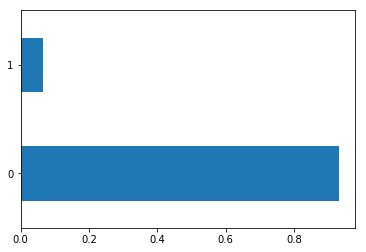

In [10]:
df["SeriousDlqin2yrs"].value_counts(normalize=True).plot(kind="barh")
plt.show()

In [11]:
# 93% non-default rates
#6% default rates

# RevolvingUtilizationOfUnsecuredLines

In [12]:
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

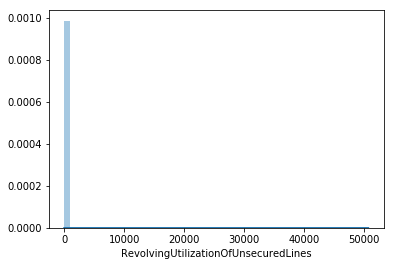

In [13]:
sns.distplot(df["RevolvingUtilizationOfUnsecuredLines"])

In [14]:
#Remove outliers just for plotting

In [15]:
len(df[df["RevolvingUtilizationOfUnsecuredLines"]>1])

3321

In [16]:
# we will impute with mean, the missing values since the count is too high

Outliers are normally dropped from the dataset. However, since the number of outlier observations are large, we will treat these as missing values and impute

In [17]:
df["RevolvingUtilizationOfUnsecuredLines"]=df["RevolvingUtilizationOfUnsecuredLines"].apply(lambda x:np.NaN if x>1 else x)

In [18]:
len(df[df["RevolvingUtilizationOfUnsecuredLines"]>1])

0

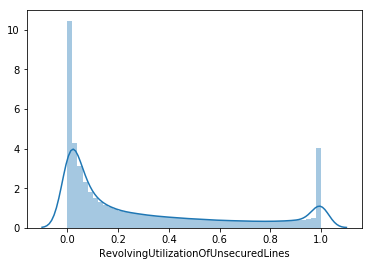

In [19]:
sns.distplot(df["RevolvingUtilizationOfUnsecuredLines"].dropna())   #here, min to max for our column is 0 to 1.


In [20]:
df["RevolvingUtilizationOfUnsecuredLines"].fillna(method="ffill",inplace=True)

# After imputing with median we noticed a spike at the place of median.
# Hence, we adopted an imputation method which preserved the distribution of data. method=ffill

In [21]:
df["RevolvingUtilizationOfUnsecuredLines"].fillna(df["RevolvingUtilizationOfUnsecuredLines"].median(),inplace=True)

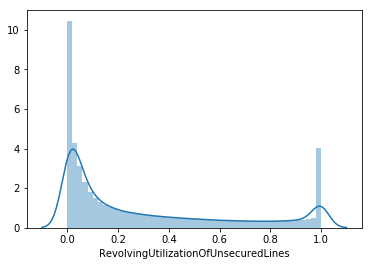

In [22]:
sns.distplot(df["RevolvingUtilizationOfUnsecuredLines"])

In [23]:
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          0.303850
std           0.337882
min           0.000000
25%           0.028597
50%           0.144594
75%           0.520414
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

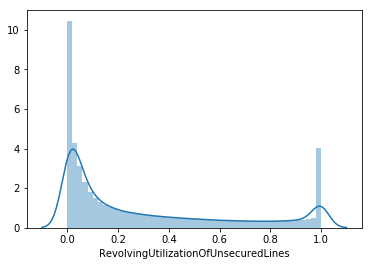

In [24]:
sns.distplot(df["RevolvingUtilizationOfUnsecuredLines"])

# AGE

In [25]:
df["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

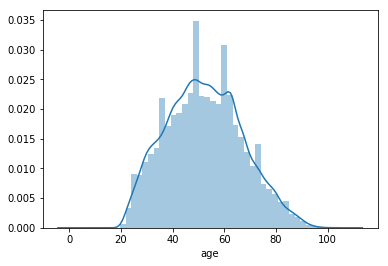

In [26]:
sns.distplot(df["age"])
plt.show()

In [27]:
len(df[df.age>80])

4936

In [28]:
len(df[df.age<20])

1

In [29]:
df["age"]=df["age"].apply(lambda x:np.NaN if (x>80)|(x<18) else x)

Finance industry typically limit age of customers between 18 and 80.
Also, there are about 4000 observations above 80 years of age.
Since, this is large we made those values missing to impute later

In [30]:
df["age"].describe()

count    145063.000000
mean         51.171663
std          13.665503
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

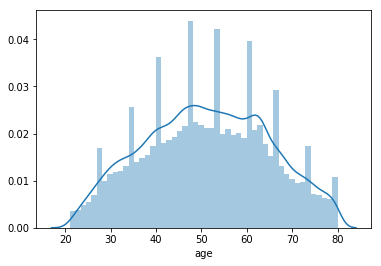

In [31]:
sns.distplot(df["age"].dropna())

In [32]:
df["age"].fillna(method="ffill",inplace=True)

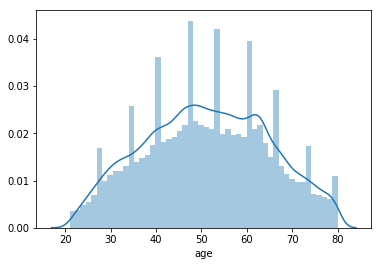

In [33]:
sns.distplot(df["age"])
plt.show()

In [34]:
df["age"].describe()

count    150000.000000
mean         51.171400
std          13.671069
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

# DebtRatio

In [35]:
df["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

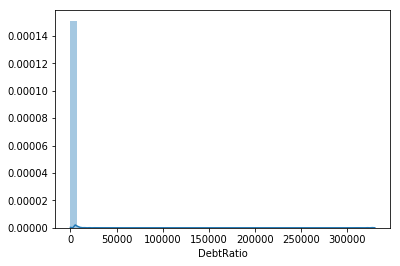

In [36]:
sns.distplot(df["DebtRatio"])

In [37]:
len(df[df['DebtRatio']>1])

35137

In [38]:
df["DebtRatio"]=df["DebtRatio"].apply(lambda x:np.NaN if (x>1) else x)

In [39]:
df["DebtRatio"].describe()

count    114863.000000
mean          0.303022
std           0.226287
min           0.000000
25%           0.125981
50%           0.274505
75%           0.438098
max           1.000000
Name: DebtRatio, dtype: float64

In [40]:
#sns.distplot(df["DebtRatio"].dropna())

In [41]:
df["DebtRatio"].fillna(method="ffill",inplace=True)

In [42]:
#sns.distplot(df["DebtRatio"].dropna())

In [43]:
df["DebtRatio"].describe()

count    150000.000000
mean          0.302898
std           0.226349
min           0.000000
25%           0.126109
50%           0.274727
75%           0.437776
max           1.000000
Name: DebtRatio, dtype: float64

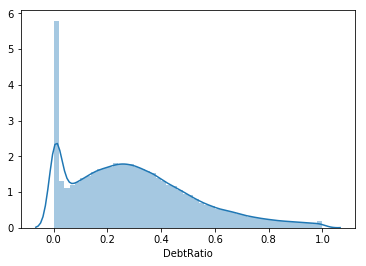

In [44]:
sns.distplot(df["DebtRatio"])

### NumberOfOpenCreditLinesAndLoans

In [45]:
df["NumberOfOpenCreditLinesAndLoans"].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

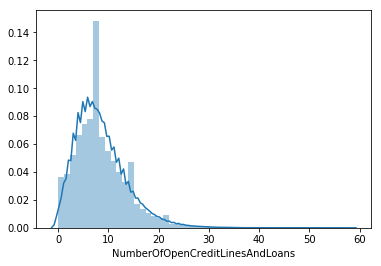

In [46]:
sns.distplot(df.NumberOfOpenCreditLinesAndLoans)

Since, this variable is approximately normal,we decided the upper cutoff limit based on distribution based method (values greater than mu+3*sigma). Since, the number of observations were less, we decided to cap the large values to the cutoff.

In [47]:
# Since, it is normally distributed, we will go with mean method

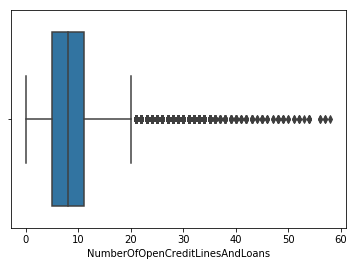

In [48]:
sns.boxplot(df.NumberOfOpenCreditLinesAndLoans) #boxplot method (IQR method cutoff is 20)

In [49]:
a=np.std(df.NumberOfOpenCreditLinesAndLoans)
a


5.145933836446668

In [50]:
mean_a=df["NumberOfOpenCreditLinesAndLoans"].mean()
mean_a

8.45276

In [51]:
outlierthreshold=mean_a+(3*a)
outlierthreshold

23.890561509340003

# based on zscore method: cutoff is 23.8 since data is normally distributed so we choose this. formula is mean+(3*sigma)

In [52]:
df.loc[df["NumberOfOpenCreditLinesAndLoans"]>24,"NumberOfOpenCreditLinesAndLoans"]=24

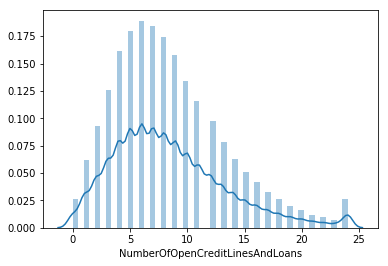

In [53]:
sns.distplot(df.NumberOfOpenCreditLinesAndLoans)

# MonthlyIncome

In [54]:
df["MonthlyIncome"].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [55]:
df.MonthlyIncome.count() #many missing values

120269

In [56]:
df.max()

ID                                       150000.0
SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines          1.0
age                                          80.0
DebtRatio                                     1.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              24.0
NumberRealEstateLoansOrLines                 54.0
NumberOfDependents                           20.0
dtype: float64

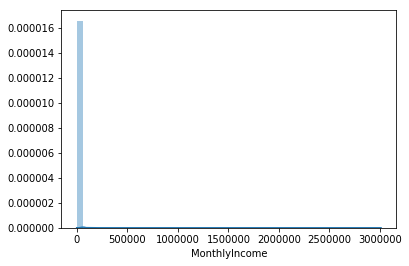

In [57]:
sns.distplot(df["MonthlyIncome"].dropna())

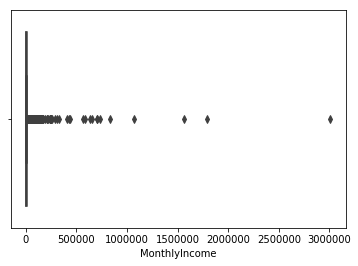

In [58]:
sns.boxplot(df["MonthlyIncome"])

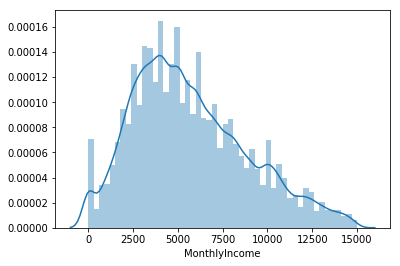

In [59]:
df2=df[df["MonthlyIncome"]<15000]
sns.distplot(df2["MonthlyIncome"])

# we need to use IQR method as mean and median are highly contaminated

In [60]:
Q1=np.quantile(df2.MonthlyIncome,0.25)
Q3=np.quantile(df2.MonthlyIncome,0.75)
IQR=Q3-Q1
IQR

4423.25

In [61]:
UW=Q3+(IQR*1.5)
UW

14358.125

In [62]:
df["MonthlyIncome"]=df["MonthlyIncome"].apply(lambda x:np.NaN if (x<1000)|(x>15500) else x)

Typical lower limit for monthly income to be serviced by Finance industry is $1000.
Upper cutoff is decided based on IQR method as the mean and the sigma are contaminated by extremely high outlier values

In [63]:
df["MonthlyIncome"].describe()

count    110958.000000
mean       5978.202906
std        3157.675863
min        1000.000000
25%        3500.000000
50%        5385.500000
75%        7983.000000
max       15500.000000
Name: MonthlyIncome, dtype: float64

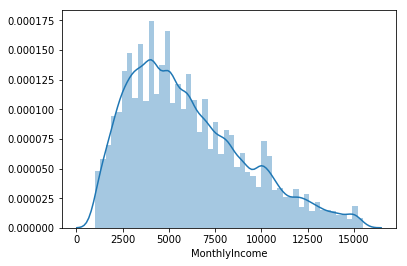

In [64]:
sns.distplot(df["MonthlyIncome"].dropna())

In [65]:
df["MonthlyIncome"].fillna(method="ffill",inplace=True)

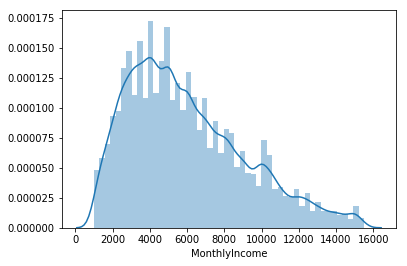

In [66]:
sns.distplot(df["MonthlyIncome"])

In [67]:
df["MonthlyIncome"].describe()

count    150000.000000
mean       5978.488080
std        3155.969476
min        1000.000000
25%        3500.000000
50%        5375.000000
75%        8000.000000
max       15500.000000
Name: MonthlyIncome, dtype: float64

# NumberRealEstateLoansOrLines 

In [70]:
df["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

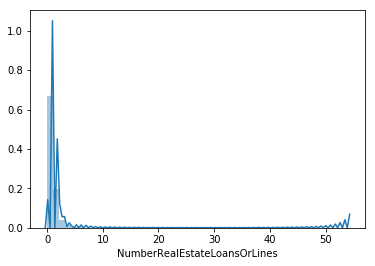

In [71]:
sns.distplot(df["NumberRealEstateLoansOrLines"])

In [74]:
Q1=np.quantile(df.NumberRealEstateLoansOrLines,0.25)
Q3=np.quantile(df.NumberRealEstateLoansOrLines,0.75)
IQR=Q3-Q1
IQR

2.0

In [75]:
UW=Q3+(IQR*1.5)
UW

5.0

In [76]:
df["NumberRealEstateLoansOrLines"]=df["NumberRealEstateLoansOrLines"].apply(lambda x: np.NaN if (x>5) else x)

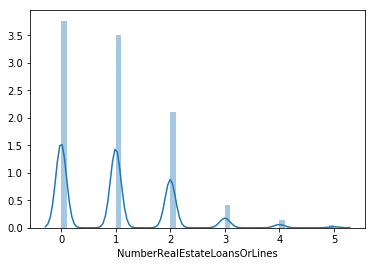

In [78]:
sns.distplot(df["NumberRealEstateLoansOrLines"].dropna())

In [80]:
df["NumberRealEstateLoansOrLines"].fillna(df["NumberRealEstateLoansOrLines"].median(),inplace=True)

In [81]:
df["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          0.981333
std           0.977796
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

# NumberOfDependents

In [82]:
df["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

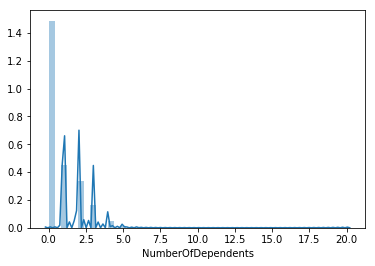

In [84]:
sns.distplot(df["NumberOfDependents"].dropna())

In [85]:
df.loc[df["NumberOfDependents"]>5,"NumberOfDependents"]=5

In [86]:
df["NumberOfDependents"].fillna(0,inplace=True)

In [87]:
df["NumberOfDependents"].describe()

count    150000.000000
mean          0.734747
std           1.093439
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

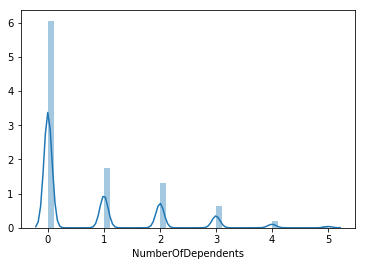

In [88]:
sns.distplot(df["NumberOfDependents"])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 24406 to 143928
Data columns (total 9 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfDependents                      150000 non-null float64
dtypes: float64(6), int64(3)
memory usage: 11.4 MB


In [90]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.303850,51.171400,0.302898,5978.488080,8.404000,0.981333,0.734747
std,43301.414527,0.249746,0.337882,13.671069,0.226349,3155.969476,4.946399,0.977796,1.093439
min,1.000000,0.000000,0.000000,21.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.028597,41.000000,0.126109,3500.000000,5.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.144594,51.000000,0.274727,5375.000000,8.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.520414,62.000000,0.437776,8000.000000,11.000000,2.000000,1.000000
max,150000.000000,1.000000,1.000000,80.000000,1.000000,15500.000000,24.000000,5.000000,5.000000


# Data cleaning done, we can proceed with EDA now
   

1. Univariate: while cleaning data, we did
    2. Bivariate: we will do now

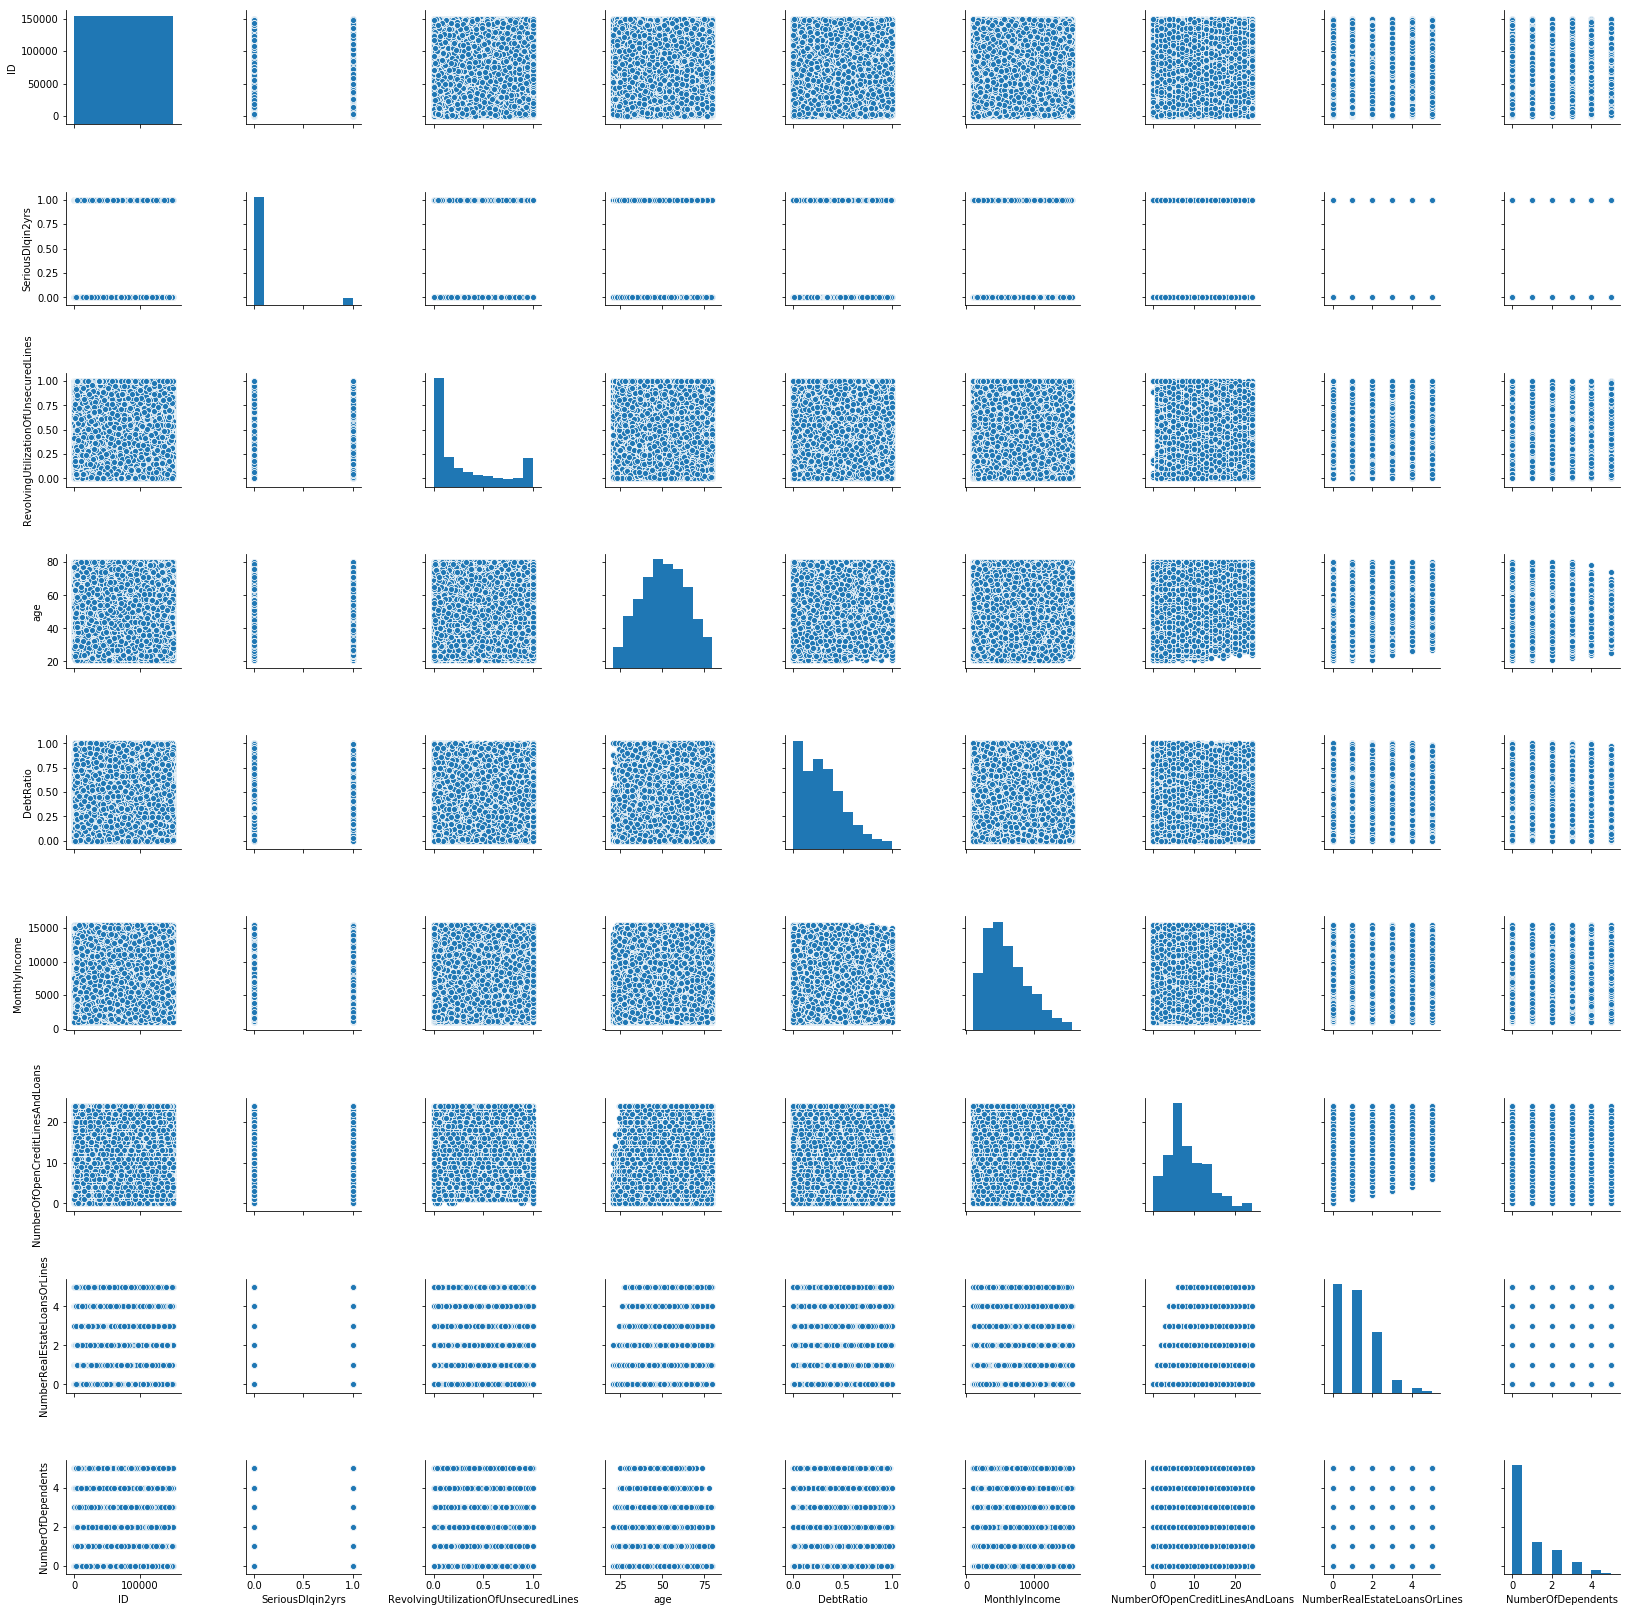

In [93]:
## sns.pairplot(df)

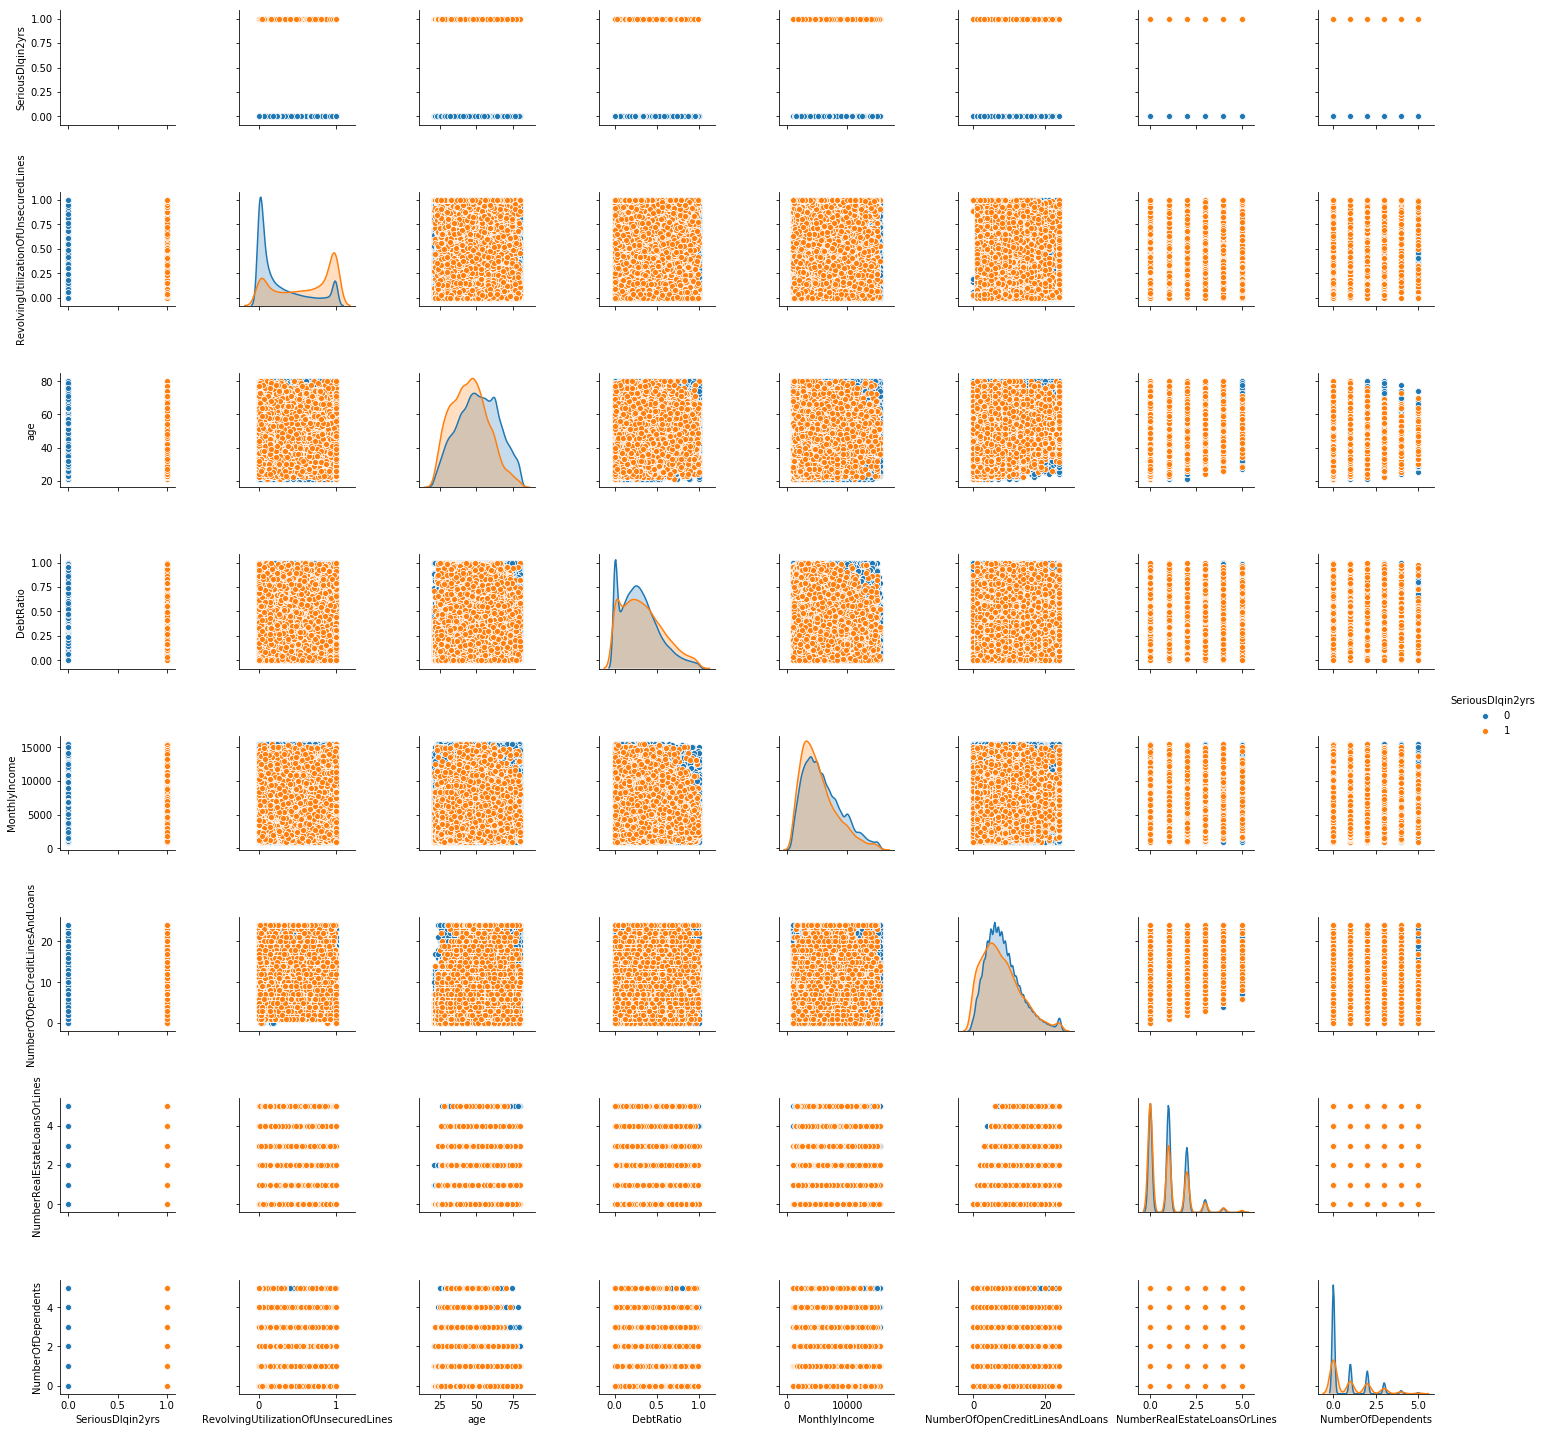

In [94]:
dfs=df.drop("ID",axis=1)

sns.pairplot(dfs,hue="SeriousDlqin2yrs")
plt.show()

SeriousDlqin2yrs and RevolvingUtilizationOfUnsecuredLines 

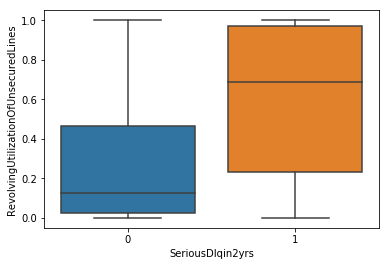

In [112]:
sns.boxplot(x="SeriousDlqin2yrs",y="RevolvingUtilizationOfUnsecuredLines",data=df)

In [96]:
df["RevolvingUtilizationOfUnsecuredLines"].groupby(df["SeriousDlqin2yrs"]).agg(["mean"])

,mean
SeriousDlqin2yrs,
0,0.282850
1,0.597031


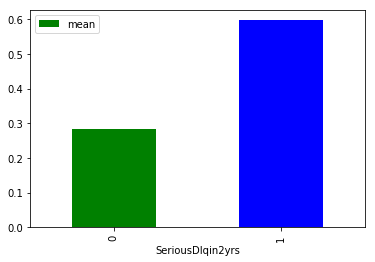

In [100]:
df["RevolvingUtilizationOfUnsecuredLines"].groupby(df["SeriousDlqin2yrs"]).agg(["mean"]).plot(kind="bar",color=[["green","blue"]])

The chart shows that mean value of RevolvingUtilizationOfUnsecuredLines is almost double for Delinquents as compared to non-delinquents.
This observation is inline with what we normally observed in Finance industry.

In [101]:
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          0.303850
std           0.337882
min           0.000000
25%           0.028597
50%           0.144594
75%           0.520414
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [102]:
def rucl_cat(rucl):
    if (rucl<=0.02):
        return 1
    elif (0.02<rucl<=0.14):
        return 2
    elif (0.14<rucl<=0.52):
        return 3
    else:
        return 4
        
    

In [104]:
df["rucl_cat"]=df["RevolvingUtilizationOfUnsecuredLines"].apply(rucl_cat)

In [105]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,rucl_cat
24406,24407,0,0.370779,51.0,0.359411,5700.0,9,1.0,0.0,3
123021,123022,0,0.000000,60.0,0.000000,8200.0,4,0.0,0.0,1
133330,133331,0,1.000000,32.0,0.051918,3466.0,3,0.0,0.0,4
139111,139112,0,0.015016,33.0,0.531437,4500.0,9,2.0,1.0,1
65514,65515,0,0.009483,51.0,0.029950,4500.0,11,0.0,0.0,1


In [106]:
df["rucl_cat"].value_counts()

2    42839
3    38294
4    37523
1    31344
Name: rucl_cat, dtype: int64

In [107]:
df["RevolvingUtilizationOfUnsecuredLines"].groupby(df["rucl_cat"]).agg(["min","max"])

,min,max
rucl_cat,,
1,0.000000,0.020000
2,0.020003,0.139999
3,0.140022,0.519983
4,0.520023,1.000000


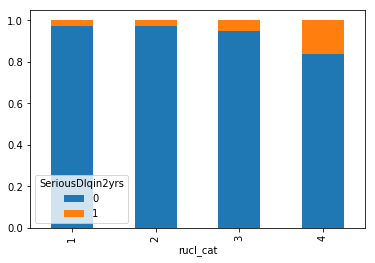

In [111]:
ct=pd.crosstab(df["rucl_cat"],df["SeriousDlqin2yrs"],normalize=0)
ct.plot.bar(stacked=True)

The chart shows that rucl more than 0.52 (category 4) is quite prone to delinquency

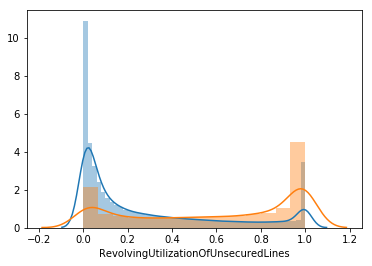

In [114]:
df0=df[df["SeriousDlqin2yrs"]==0]
df1=df[df["SeriousDlqin2yrs"]==1]

sns.distplot(df0["RevolvingUtilizationOfUnsecuredLines"])
sns.distplot(df1["RevolvingUtilizationOfUnsecuredLines"])

plt.show()


# SeriousDlqin2yrs and MonthlyIncome

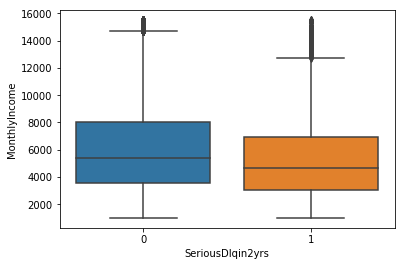

In [116]:
sns.boxplot(x="SeriousDlqin2yrs",y="MonthlyIncome",data=df)
plt.show()

In [117]:
df["MonthlyIncome"].groupby(df["SeriousDlqin2yrs"]).agg(["mean"])

,mean
SeriousDlqin2yrs,
0,6026.540815
1,5307.618991


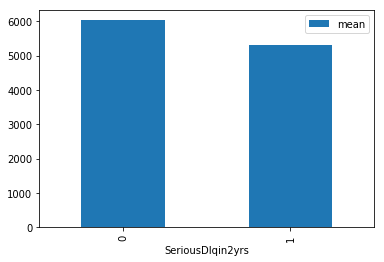

In [118]:
df["MonthlyIncome"].groupby(df["SeriousDlqin2yrs"]).agg(["mean"]).plot(kind="bar")

In [119]:
df["MonthlyIncome"].describe()

count    150000.000000
mean       5978.488080
std        3155.969476
min        1000.000000
25%        3500.000000
50%        5375.000000
75%        8000.000000
max       15500.000000
Name: MonthlyIncome, dtype: float64

In [121]:
q1=df["MonthlyIncome"].quantile(0.25)
q2=df["MonthlyIncome"].quantile(0.5)
q3=df["MonthlyIncome"].quantile(0.75)

print(q1,q2,q3)

3500.0 5375.0 8000.0


In [122]:
def MI_CAT(mi):
    if (mi<=q1):
        return 1
    elif (q1<mi<=q2):
        return 2
    elif (q2<mi<=q3):
        return 3
    else:
        return 4

In [123]:
df["MI_CAT"]=df["MonthlyIncome"].apply(MI_CAT)

In [124]:
df["MonthlyIncome"].groupby(df["MI_CAT"]).agg(["min","max"])

,min,max
MI_CAT,,
1,1000.0,3500.0
2,3501.0,5375.0
3,5376.0,8000.0
4,8001.0,15500.0


In [127]:
ct1=pd.crosstab(df["MI_CAT"],df["SeriousDlqin2yrs"],normalize=0)
ct1

SeriousDlqin2yrs,0,1
MI_CAT,,
1,0.913436,0.086564
2,0.926929,0.073071
3,0.940985,0.059015
4,0.951883,0.048117


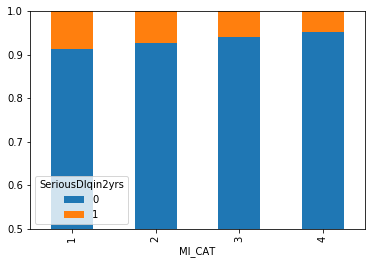

In [130]:
ct1.plot.bar(stacked=True)

plt.ylim(0.5,1)
plt.show()

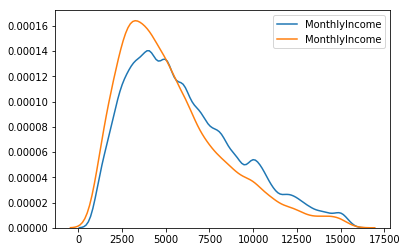

In [131]:
df0=df[df["SeriousDlqin2yrs"]==0]
df1=df[df["SeriousDlqin2yrs"]==1]

sns.kdeplot(df0.MonthlyIncome)

sns.kdeplot(df1.MonthlyIncome)